# SVM Classifier: Food Rating Classification

In this notebook, I'll continue the Thinkful lesson on SVM Classifier and transform the regression model into binary classifier to predict the rating of recipes. I'll keep 30 most significant features and apply different kernel methods to get the highest prediction accuracy.

First, let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). I'll use the CSV file here and as pull out column names and some summary statistics for ratings.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

We learn a few things from this analysis. From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71. What is interesting is that the 25th percentile is actually above the mean. This means there is likely some kind of outlier population. This makes sense when we think about reviews: some bad recipes may have very few very low reviews.

I'll use 50th percentile (median) of the rating as a cutoff for binary classification. But first, I'll have to do a bit of data cleaning.

In [5]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

What we can see right away is that nutrition information is not available for all goods. So I'll actually drop the whole columns for calories, protein, fat, and sodium.

In [6]:
data = raw_data.drop(['title', 'calories', 'protein', 'fat', 'sodium'], 1)
data['target'] = np.where(data.rating >= 4.375, 1, 0)
data.head()

,rating,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,target
0,2.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,5.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,3.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## SVM Binary Classifier
Now, I'll use default radial basis function and linear kernels to compare model performance with the different kernels and pick one of them.

Accuracy Score: 0.8384039900249377


 10-Fold Cross Validation: 
[0.72636816 0.73134328 0.7761194  0.76616915 0.75621891 0.77
 0.76       0.77       0.775      0.79      ]

 Cross Validation Score Statistics: 0.76212 (+/- 0.03765)


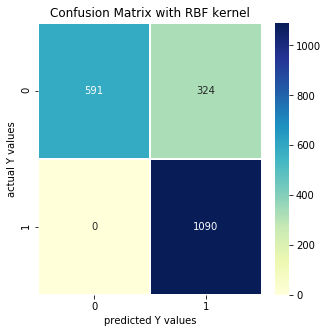

In [7]:
# radial basis function kernel
from sklearn.svm import SVC
svc = SVC()
X = data.drop(['target'], 1).sample(frac=0.1, replace=True, random_state=1)
Y = data.target.sample(frac=0.1, replace=True, random_state=1)
svc.fit(X,Y)

print('Accuracy Score: ' + str(svc.score(X, Y)) + '\n')
cvs = cross_val_score(svc, X, Y, cv=10)
print('\n 10-Fold Cross Validation: \n' + str(cvs))
print("\n Cross Validation Score Statistics: %0.5f (+/- %0.5f)" % (cvs.mean(), cvs.std() * 2))

cm_rbf = confusion_matrix(Y, svc.predict(X))

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rbf, annot = True,linewidths=0.5, cmap = 'YlGnBu',fmt = ".0f", ax=ax)
plt.title("Confusion Matrix with RBF kernel")
plt.xlabel("predicted Y values")
plt.ylabel("actual Y values")
plt.show()

Accuracy Score: 1.0


 10-Fold Cross Validation: 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

 Cross Validation Score Statistics: 1.00000 (+/- 0.00000)


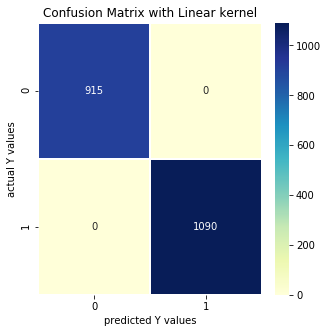

In [8]:
# linear kernel
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
X = data.drop(['target'], 1).sample(frac=0.1, replace=True, random_state=1)
Y = data.target.sample(frac=0.1, replace=True, random_state=1)
svc.fit(X,Y)

print('Accuracy Score: ' + str(svc.score(X, Y)) + '\n')
cvs = cross_val_score(svc, X, Y, cv=10)
print('\n 10-Fold Cross Validation: \n' + str(cvs))
print("\n Cross Validation Score Statistics: %0.5f (+/- %0.5f)" % (cvs.mean(), cvs.std() * 2))

cm_linear = confusion_matrix(Y, svc.predict(X))

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_linear, annot = True,linewidths=0.5, cmap = 'YlGnBu',fmt = ".0f", ax=ax)
plt.title("Confusion Matrix with Linear kernel")
plt.xlabel("predicted Y values")
plt.ylabel("actual Y values")
plt.show()

SVM with linear kernel shows 100% accuracy across 10 folds cross-validation. When we look at the confusion matrix, it also looks perfect. The model accurately defined all TP and TN values. However, these results changes when I play with the random_state configuration. I do not want to stop here and would like to apply Feature Reduction using Correlation Matrix and PCA to see if any changes will occur in the models.

## Feture Selection (Reduction) via Correlation Matrix
Let see correlation matrix and create a dataset with 30 most correlated features.

In [9]:
corr_mat = abs(data.corr()['rating'].sort_values(ascending = False)[1:31])
corr_features = corr_mat.index
data_corr = data[corr_features]
data_corr.head()

,target,bon appétit,peanut free,soy free,tree nut free,bake,roast,fall,sauté,dinner,...,quick & easy,herb,pork,beef,cheese,low carb,mixer,christmas,sugar conscious,braise
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Accuracy Score: 0.598004987531172


 10-Fold Cross Validation: 
[0.57711443 0.6119403  0.6318408  0.52736318 0.53731343 0.515
 0.545      0.6        0.575      0.53      ]

 Cross Validation Score Statistics: 0.56506 (+/- 0.07603)


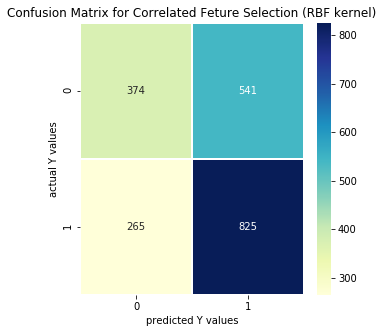

In [10]:
# radial basis function kernel
from sklearn.svm import SVC
svc = SVC()
X = data_corr.drop(['target'], 1).sample(frac=0.1, replace=True, random_state=1)
Y = data_corr.target.sample(frac=0.1, replace=True, random_state=1)
svc.fit(X,Y)

print('Accuracy Score: ' + str(svc.score(X, Y)) + '\n')
cvs = cross_val_score(svc, X, Y, cv=10)
print('\n 10-Fold Cross Validation: \n' + str(cvs))
print("\n Cross Validation Score Statistics: %0.5f (+/- %0.5f)" % (cvs.mean(), cvs.std() * 2))


cm_corr_rbf = confusion_matrix(Y, svc.predict(X))

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_corr_rbf, annot = True,linewidths=0.5, cmap = 'YlGnBu',fmt = ".0f", ax=ax)
plt.title("Confusion Matrix for Correlated Feture Selection (RBF kernel)")
plt.xlabel("predicted Y values")
plt.ylabel("actual Y values")
plt.show()

Accuracy Score: 0.6099750623441397


 10-Fold Cross Validation: 
[0.57711443 0.64676617 0.65671642 0.54726368 0.54726368 0.56
 0.505      0.6        0.565      0.5       ]

 Cross Validation Score Statistics: 0.57051 (+/- 0.09929)


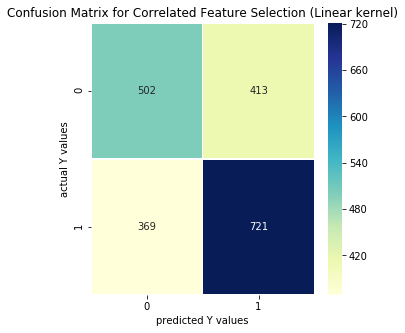

In [11]:
# linear kernel
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
X = data_corr.drop(['target'], 1).sample(frac=0.1, replace=True, random_state=1)
Y = data_corr.target.sample(frac=0.1, replace=True, random_state=1)
svc.fit(X,Y)

print('Accuracy Score: ' + str(svc.score(X, Y)) + '\n')
cvs = cross_val_score(svc, X, Y, cv=10)
print('\n 10-Fold Cross Validation: \n' + str(cvs))
print("\n Cross Validation Score Statistics: %0.5f (+/- %0.5f)" % (cvs.mean(), cvs.std() * 2))

cm_corr_linear = confusion_matrix(Y, svc.predict(X))

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_corr_linear, annot = True,linewidths=0.5, cmap = 'YlGnBu',fmt = ".0f", ax=ax)
plt.title("Confusion Matrix for Correlated Feature Selection (Linear kernel)")
plt.xlabel("predicted Y values")
plt.ylabel("actual Y values")
plt.show()

## Principal Component Analysis

Accuracy Score: 0.5571072319201995


 10-Fold Cross Validation: 
[0.54228856 0.53731343 0.57711443 0.52736318 0.52736318 0.535
 0.555      0.525      0.56       0.55      ]

 Cross Validation Score Statistics: 0.54364 (+/- 0.03195)


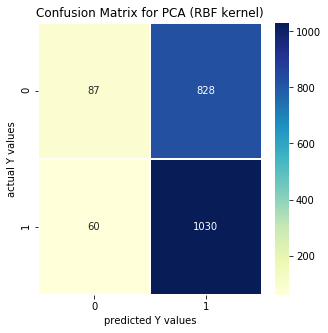

In [12]:
# PCA
pca = PCA(n_components = 30)
data_pca = data.drop(['target'], 1).sample(frac = 0.1, replace = True, random_state = 42)
data_pca = pca.fit_transform(data_pca)

# radial basis function kernel
svc = SVC()
X = data_pca
Y = data.target.sample(frac=0.1, replace=True, random_state=1)
svc.fit(X,Y)

print('Accuracy Score: ' + str(svc.score(X, Y)) + '\n')
cvs = cross_val_score(svc, X, Y, cv=10)
print('\n 10-Fold Cross Validation: \n' + str(cvs))
print("\n Cross Validation Score Statistics: %0.5f (+/- %0.5f)" % (cvs.mean(), cvs.std() * 2))

# plot the confusion matrix
cm_pca_rbf = confusion_matrix(Y, svc.predict(X))

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_pca_rbf, annot = True,linewidths=0.5, cmap = 'YlGnBu',fmt = ".0f", ax=ax)
plt.title("Confusion Matrix for PCA (RBF kernel)")
plt.xlabel("predicted Y values")
plt.ylabel("actual Y values")
plt.show()

Accuracy Score: 0.5341645885286783


 10-Fold Cross Validation: 
[0.53465347 0.53233831 0.53233831 0.51741294 0.535      0.535
 0.535      0.535      0.535      0.495     ]

 Cross Validation Score Statistics: 0.52867 (+/- 0.02469)


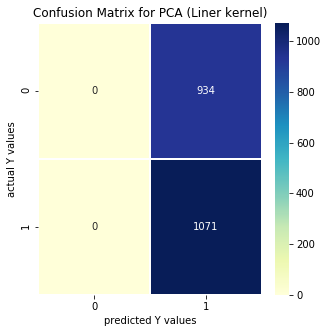

In [14]:
# linear kernel
svc = SVC(kernel = 'linear')
X = data_pca
Y = data.target.sample(frac=0.1, random_state=1)
svc.fit(X,Y)

print('Accuracy Score: ' + str(svc.score(X, Y)) + '\n')
cvs = cross_val_score(svc, X, Y, cv=10)
print('\n 10-Fold Cross Validation: \n' + str(cvs))
print("\n Cross Validation Score Statistics: %0.5f (+/- %0.5f)" % (cvs.mean(), cvs.std() * 2))

cm_pca_linear = confusion_matrix(Y, svc.predict(X))

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_pca_linear, annot = True,linewidths=0.5, cmap = 'YlGnBu',fmt = ".0f", ax=ax)
plt.title("Confusion Matrix for PCA (Liner kernel)")
plt.xlabel("predicted Y values")
plt.ylabel("actual Y values")
plt.show()

## Conclusion
After trying three different models (with all features, 30 most correlated features and PCA with 30 components), I can say that the radial basis function kernel gives more accurate results than the linear kernel. Also, I figured out that the feature selection using correlation matrix works better than PCA for this dataset. But the model accuracy using all the features is higher though there is an overfitting issue(?).